```markdown
Name : Kevin A. Patel 
Subject : Machine Learning (303105353)
Enrolment No. : 2203051050755 
```

```markdown
-----------------------------------------------------------------------
```

```markdown
AIM: To explore and analyze the characteristics of individuals with Autism Spectrum Disorder (ASD) using a dataset of assessment scores and demographic information, with the goal of identifying patterns and trends that can inform diagnosis, treatment, and support strategies.
```

```markdown
-----------------------------------------------------------------------
```

## 1. Importing the dependencies

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 2. Data Loading & Understanding

In [30]:
df = pd.read_csv(r'datasets/train.csv')

### Initial Inspection

In [31]:
df.shape

(800, 22)

In [32]:
df.head(5)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [33]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,0,16.414305,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,0,46.966113,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [34]:
pd.set_option('display.max_columns', None) # To display all columns

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [36]:
#Convert age into integer 
df['age'] = df['age'].astype('int64')
df['age'].head(3)

0    38
1    47
2     7
Name: age, dtype: int64

In [37]:
for col in df.columns:
    numerical_features = ['ID','age','result']
    if col not in numerical_features:
        print(col,df[col].unique())
        print("-"*50)
        

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [38]:
#Drop id and age_description columns
df.drop(['ID','age_desc'],axis=1,inplace=True)

In [39]:
df.shape

(800, 20)

In [40]:
df.head(3)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1


In [41]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [42]:
df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [43]:
#Define mapping dictionary for country names
mapping = {
    "Viet Nam":"Vietnam",
    "AmericanSamoa":"United States",
    "Hong Kong" : "China"
    }

#Replace country names with mapped values
df['contry_of_res'] = df['contry_of_res'].replace(mapping)

In [44]:
#Target class distribution
df['Class/ASD'].value_counts() #Huge imbalance

Class/ASD
0    639
1    161
Name: count, dtype: int64

### Insights:
1. Missing values in ethnicity & relation (used ? placeholder)
2. 'age_desc' column only had one unique value . Removed that column as it was not important.
3. Fixed country names. 
4. Class imbalance in target column (ratio of imbalance : 6:1)

## 3. Exploratory Data Analysis (EDA)

In [45]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


### Univariate Analysis

**Numerical Columns**

    - Age
    - Result

In [46]:
sns.set_theme(style="darkgrid")

*Distribution Plots*

Mean:  27.96375
Median:  24.0


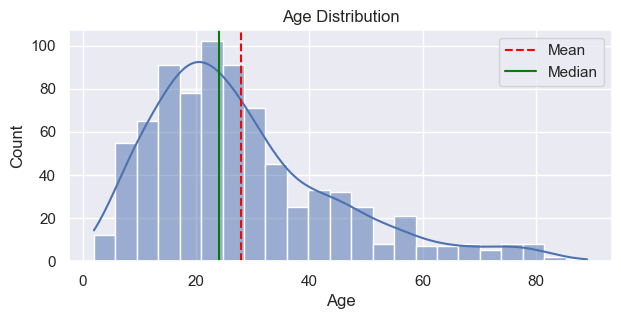

In [47]:
#Histogram for Age
plt.figure(figsize=(7,3))
sns.histplot(df['age'],kde=True)
plt.title('Age Distribution')
#Calculate mean and median
age_mean = df['age'].mean()
age_median = df['age'].median()

print("Mean: ",age_mean)
print("Median: ",age_median)

#Add vertical line for mean and median 
plt.axvline(age_mean,color = 'red',linestyle = "--", label = "Mean")
plt.axvline(age_median, color = 'green', linestyle = "-", label = "Median")
plt.legend()
plt.xlabel("Age")
plt.show()

Mean:  8.537303106501248
Median:  9.605299308


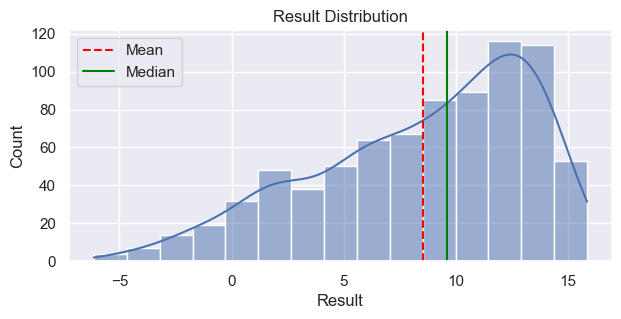

In [48]:
#Histogram for Result
plt.figure(figsize=(7,3))
sns.histplot(df['result'],kde=True)
plt.title('Result Distribution')
#Calculate mean and median
result_mean = df['result'].mean()
result_median = df['result'].median()

print("Mean: ",result_mean)
print("Median: ",result_median)

#Add vertical line for mean and median 
plt.axvline(result_mean,color = 'red',linestyle = "--", label = "Mean")
plt.axvline(result_median, color = 'green', linestyle = "-", label = "Median")
plt.legend()
plt.xlabel("Result")
plt.show()

*Box Plots for identifying outliers in numerical columns*

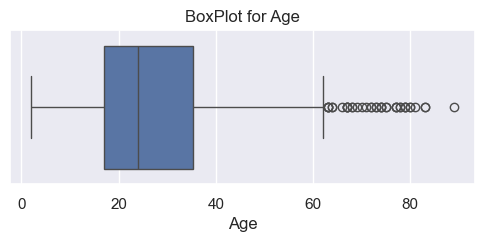

In [49]:
plt.figure(figsize=(6,2))
sns.boxplot(x = df['age'])
plt.title("BoxPlot for Age")
plt.xlabel("Age")
plt.show()

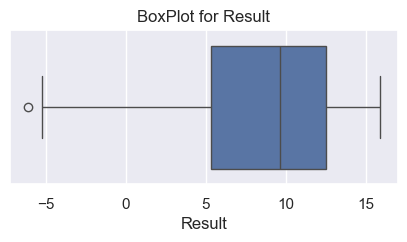

In [50]:
plt.figure(figsize=(5,2))
sns.boxplot(x = df['result'])
plt.title("BoxPlot for Result")
plt.xlabel("Result")
plt.show()

In [51]:
#Count outliers using IQR method
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bounds = Q1 - 1.5 * IQR
upper_bounds = Q3 + 1.5 * IQR

age_outliers = df[(df['age'] < lower_bounds) | (df['age'] > upper_bounds)]

len(age_outliers)

39

In [52]:
#Count outliers using IQR method
Q1 = df['result'].quantile(0.25)
Q3 = df['result'].quantile(0.75)
IQR = Q3 - Q1
lower_bounds = Q1 - 1.5 * IQR
upper_bounds = Q3 + 1.5 * IQR

result_outliers = df[(df['result'] < lower_bounds) | (df['result'] > upper_bounds)]

len(result_outliers)

1

##### Univariate Analysis for Categorical Columns

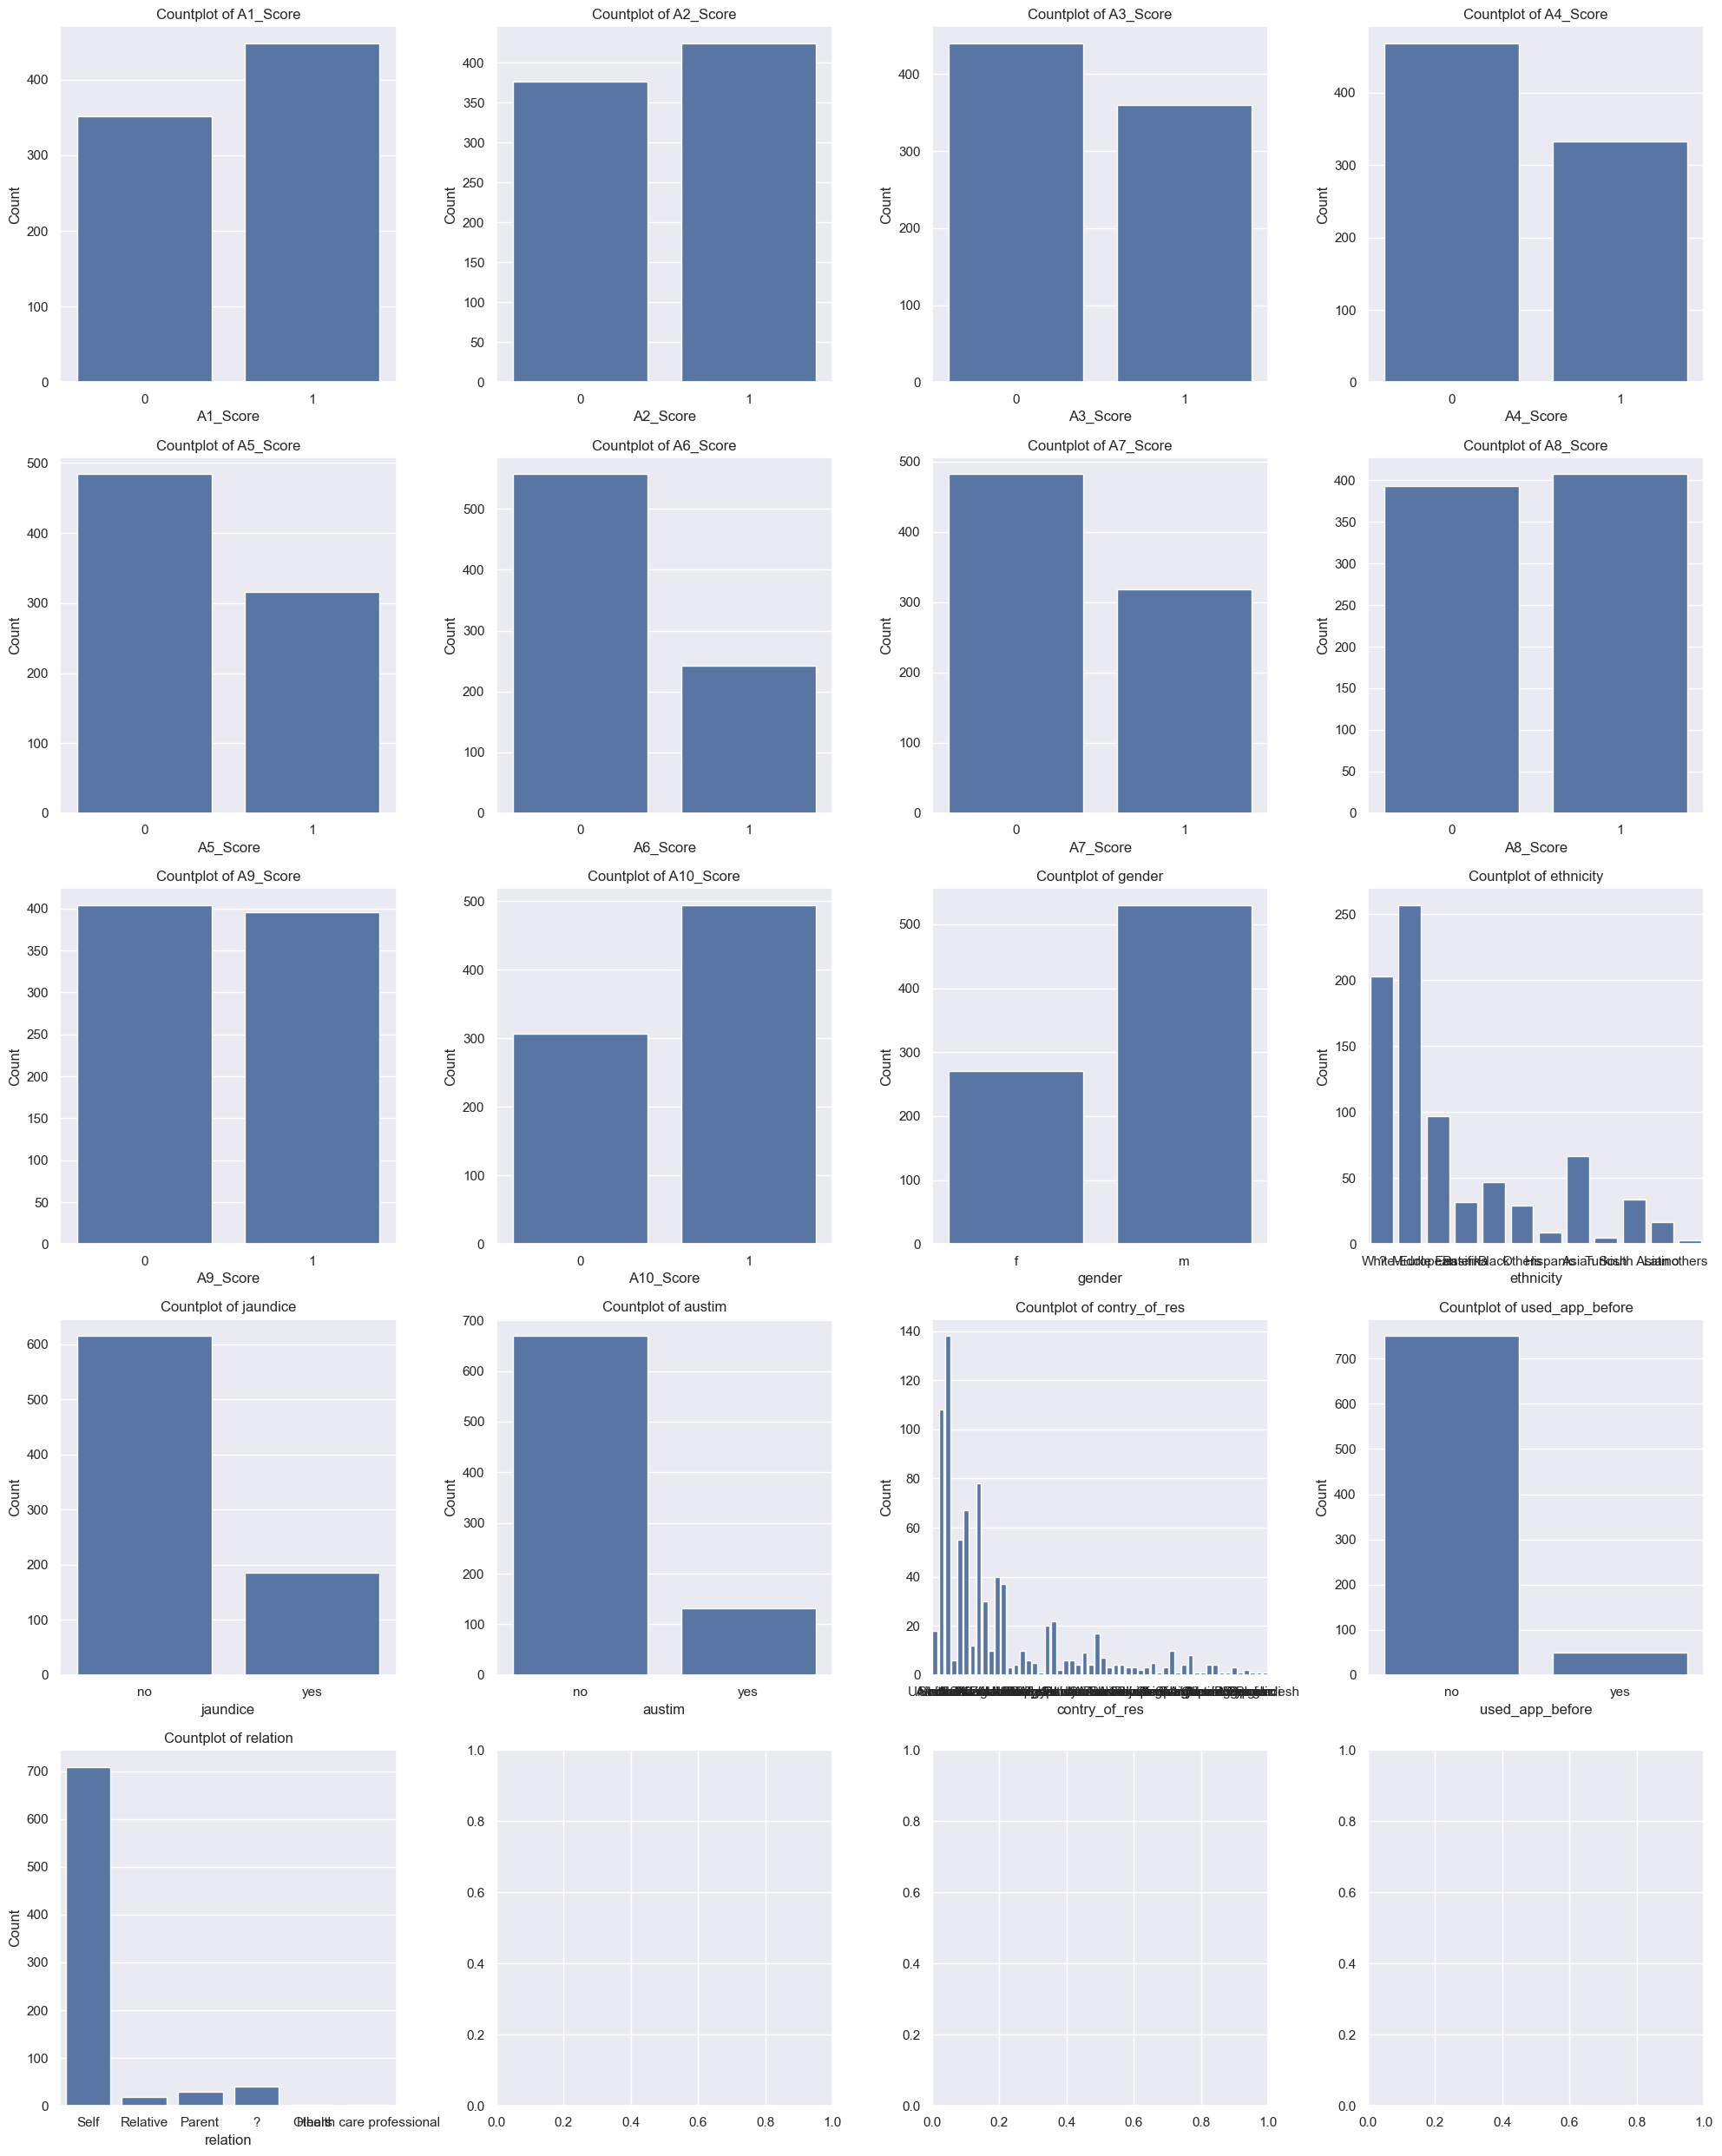

In [53]:
categorical_columns = ['A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score','gender','ethnicity','jaundice','austim','contry_of_res','used_app_before','relation']

n_rows = (len(categorical_columns) + 3) // 4
n_cols = 4

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5*n_rows))

for i, col in enumerate(categorical_columns):
    sns.countplot(x=df[col], ax=axs[i // n_cols, i % n_cols])
    axs[i // n_cols, i % n_cols].set_title(f"Countplot of {col}")
    axs[i // n_cols, i % n_cols].set_xlabel(col)
    axs[i // n_cols, i % n_cols].set_ylabel("Count")

fig.tight_layout()

plt.show()

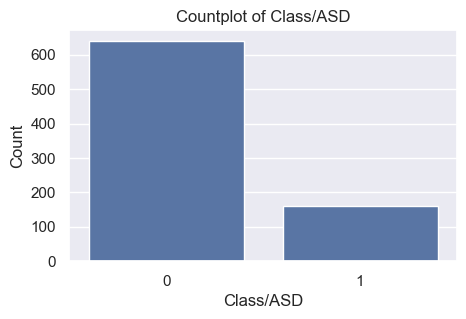

In [54]:
#Countplot for target column(Class/ASD)
plt.figure(figsize=(5,3))
sns.countplot(x = df['Class/ASD'])
plt.title("Countplot of Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()

In [55]:
df['Class/ASD'].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

*Handle missing values in ethnicity and relation columns*

In [56]:
df['ethnicity'] = df['ethnicity'].replace({"?":"Others","others":"Others"})

df['ethnicity'].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [57]:
df['relation'] = df['relation'].replace({
    "?":"Others",
    "Relative" : "Others",
    "Parent" : "Others",
    "Health care professional" : "Others"
})

df['relation'].unique()

array(['Self', 'Others'], dtype=object)

*Label Encoding*

In [58]:
#Identify columns with object datatype
object_columns = df.select_dtypes(include=["object"]).columns
object_columns

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')

In [59]:
#Initialize dictionary to store encoders and apply data encoding and store the encoders.
encoders = {}

for column in object_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder

with open("encoders.pkl",'wb') as f:
    pickle.dump(encoders, f)

In [60]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [61]:
df.head(5)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,1,0


##### Bivariate Analysis

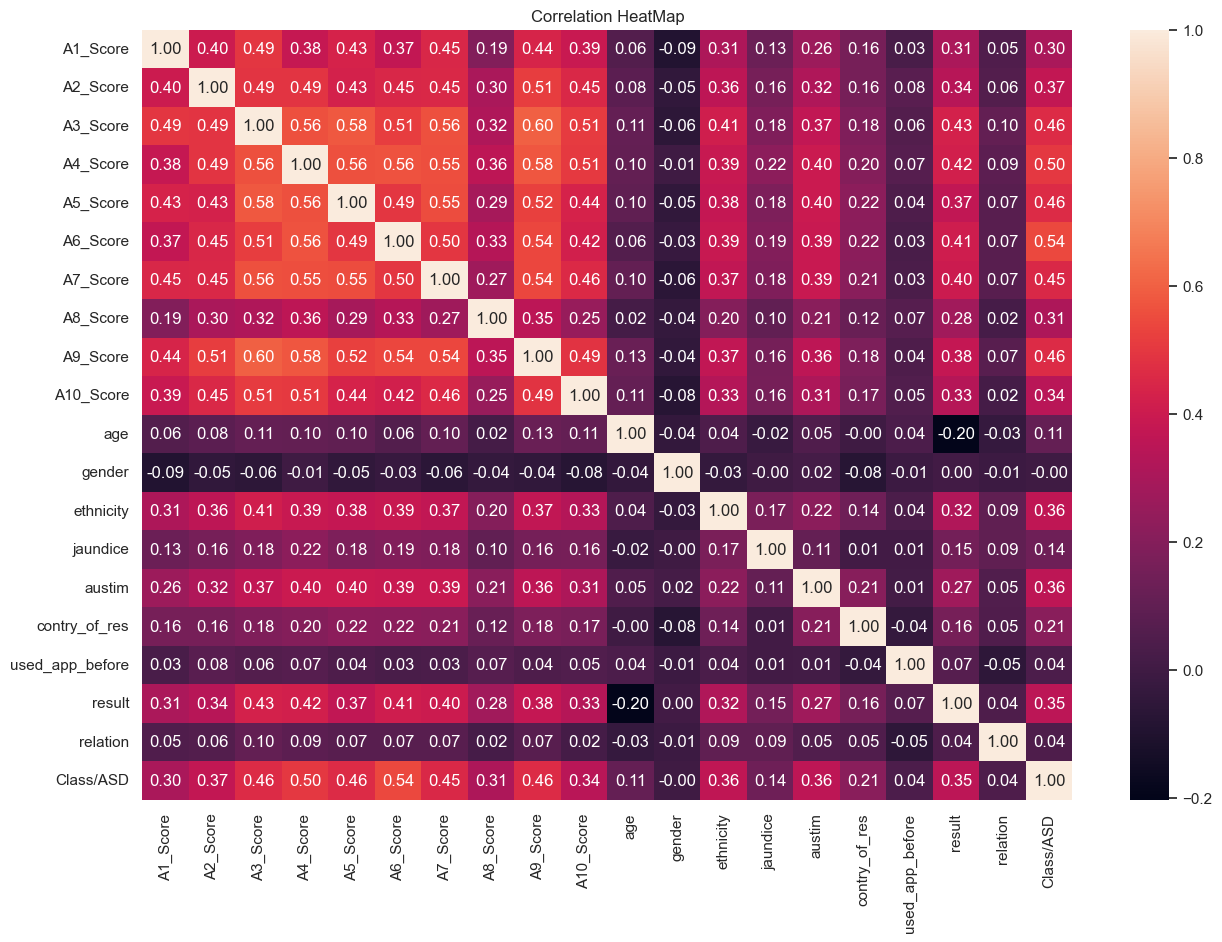

In [62]:
#Correlation matrix 
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True, cmap = "rocket" ,fmt= '.2f')
plt.title("Correlation HeatMap")
plt.show()


### Insights Of EDA:

- There are few outliers in numerical columns (age,results).
- There is a class imbalance in the target column.
- There is a class imbalance in the categorical features as well.
- We don't have any highly correlated column.
- Performed label encoding and saved the encoders.

## 4.Data Preprocessing 

*Handling the outliers*

In [63]:
# Replace outliers with median values
def replace_outliers_with_median(df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    median = df[column].median()

    df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

    return df

In [64]:
df = replace_outliers_with_median(df, "age")
df = replace_outliers_with_median(df, "result")

#### Train Test Split

In [65]:
X = df.drop(columns = ["Class/ASD"])
y = df["Class/ASD"]

In [66]:
X_train ,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [67]:
print(y_train.shape)
print(y_test.shape)

(640,)
(160,)


In [68]:
y_train.value_counts()

Class/ASD
0    515
1    125
Name: count, dtype: int64

In [69]:
y_test.value_counts()

Class/ASD
0    124
1     36
Name: count, dtype: int64

***SMOTE(Synthetic Minority OverSampling Technique)***

In [70]:
smote = SMOTE(random_state= 42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [71]:
print(y_train_smote.shape)
print(y_train_smote.value_counts())

(1030,)
Class/ASD
1    515
0    515
Name: count, dtype: int64


## 5.Model Training

In [72]:
#List of classifiers
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest" : RandomForestClassifier(random_state=42),
    "XGBoost" : XGBClassifier(random_state=42)
}

In [73]:
#Dictionary to store cross validation results
cv_scores = {}
#Perform 5 fold cross-val for each model

for model_name , model in models.items():
    print(f"Training {model_name} with default parameters....")
    scores = cross_val_score(model, X_train_smote , y_train_smote , cv=5 ,scoring="accuracy")
    cv_scores[model_name] = scores
    print(f"{model_name} Cross Validation Accuracy: {np.mean(scores):.2f}")
    print("-"*50)

Training Decision Tree with default parameters....
Decision Tree Cross Validation Accuracy: 0.86
--------------------------------------------------
Training Random Forest with default parameters....
Random Forest Cross Validation Accuracy: 0.92
--------------------------------------------------
Training XGBoost with default parameters....
XGBoost Cross Validation Accuracy: 0.90
--------------------------------------------------


## 6.Model Selection and HyperParameter Tuning

In [74]:
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost_classifier = XGBClassifier(random_state = 42)

In [75]:
# Hyperparameter grids for RandomizedSearchCV
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30,50,70],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }

param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30,50,70],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }

param_grid_xgb = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap' :[True,False]
    }

param_grid_xgb = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]    
    }

In [76]:
#Hyperparameter tuning for three models

random_search_dt = RandomizedSearchCV(estimator=decision_tree, param_distributions= param_grid_dt, cv=5, n_iter = 10, scoring="accuracy", random_state=42)

random_search_rf = RandomizedSearchCV(estimator=random_forest, param_distributions= param_grid_rf, cv=5, n_iter = 10, scoring="accuracy", random_state=42)

random_search_xgb = RandomizedSearchCV(estimator=xgboost_classifier, param_distributions= param_grid_xgb, cv=5, n_iter = 10, scoring="accuracy", random_state=42)

In [77]:
#Fit the models
random_search_dt.fit(X_train_smote, y_train_smote)
random_search_rf.fit(X_train_smote, y_train_smote)
random_search_xgb.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [78]:
# Get the model with best scores

best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
    best_model = random_search_dt
    best_score = random_search_dt.best_score_

if random_search_rf.best_score_ > best_score:
    best_model = random_search_rf
    best_score = random_search_rf.best_score_

if random_search_xgb.best_score_ > best_score:
    best_model = random_search_xgb
    best_score = random_search_xgb.best_score_

print(f"Best Model: {best_model.estimator.__class__.__name__}")
print(f"Best Score: {best_score:.2f}")


Best Model: RandomForestClassifier
Best Score: 0.92


In [79]:
#Save best model
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

## 7.Evaluation

Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       124
           1       0.62      0.72      0.67        36

    accuracy                           0.84       160
   macro avg       0.77      0.80      0.78       160
weighted avg       0.85      0.84      0.84       160



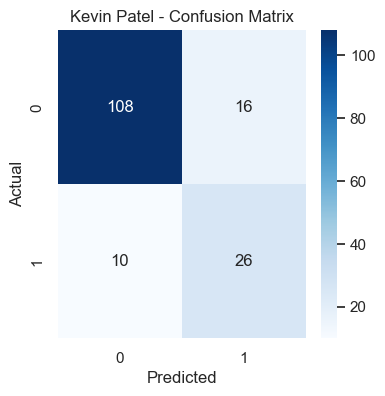

In [80]:
#Evaluate on the original test data 

y_pred = best_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues" , fmt="d")
plt.title("Kevin Patel - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()